<a href="https://colab.research.google.com/github/JSchoonmaker/blockchain_projects/blob/main/Omni_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the Data

First we set the url where the dataset can be found as the 'punks_url' variable. <br>
Next, we use read_csv to load the dataset.

In [2]:
punks_url = 'https://raw.githubusercontent.com/Omni-Analytics-Group/eth-data-science-course/master/courses/Module%201/punks.csv'

In [34]:
df_punks = pd.read_csv(punks_url, encoding='unicode_escape')

# First look at the data in Python
Use Python to look at the first few rows of data in the Punks data set. The head() function will allow you to look at the first 5 rows of the dataset. The tail() function will allow you to look at the last 5 rows of the dataset.

In [35]:
df_punks.head()

,Transaction,From,To,Crypto,USD,Txn,ID,Sex,Type,Skin,Slots,Rank
0,Sold,0xf5099e,14715954,25.00,2822.0,2018-11-30,0,Girl,Female,Mid,3,3682560000%
1,Sold,0x00d7c9,10528156,1.60,386.0,2017-07-07,0,Girl,Female,Mid,3,3682560000%
2,Sold,0xc352b5,55241,0.98,320.0,2017-06-23,0,Girl,Female,Mid,3,3682560000%
3,Claimed,NaN,12800693,NaN,NaN,2017-06-23,0,Girl,Female,Mid,3,3682560000%
4,Sold,EliteCat,0xcf6165,60.00,36305.0,2020-11-30,1,Guy,Male,Dark,2,2050240500%


In [36]:
df_punks.tail()

,Transaction,From,To,Crypto,USD,Txn,ID,Sex,Type,Skin,Slots,Rank
17549,Sold,TJ2010,gaus,59.0,21062.0,2020-09-27,9997,Guy,Zombie,Zombie,2,0.023188000%
17550,Claimed,NaN,TJ2010,NaN,NaN,2017-06-23,9997,Guy,Zombie,Zombie,2,0.023188000%
17551,Sold,7595170,TokenAng,15.0,9499.0,2020-12-27,9998,Girl,Female,Mid,3,1452800000%
17552,Claimed,NaN,0x73e4a2,NaN,NaN,2017-06-23,9998,Girl,Female,Mid,3,1452800000%
17553,Claimed,NaN,8269084,NaN,NaN,2017-06-23,9999,Girl,Female,Dark,2,1752960000%


# Crypto Punks Data Attributes

The command .info() gives us information about the dataframe including number of rows and name, number, and data type for each column.

In [37]:
df_punks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17554 entries, 0 to 17553
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Transaction  17554 non-null  object 
 1   From         7554 non-null   object 
 2   To           17554 non-null  object 
 3   Crypto       7554 non-null   float64
 4   USD          7554 non-null   float64
 5   Txn          17554 non-null  object 
 6   ID           17554 non-null  int64  
 7   Sex          17554 non-null  object 
 8   Type         17554 non-null  object 
 9   Skin         17554 non-null  object 
 10  Slots        17554 non-null  int64  
 11  Rank         17554 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.6+ MB


# Crypto Punks Statistical Summary

Let's summarize the value for each variable in Punks by using .describe(). <br><br>
Note that stats such as mean, min, and max are shown only for columns containing numeric data. <br><br>
Columns containing string, or text data are summarized with a count, count of unique items, the most common value (top) and the frequency at which the top value occurs.   

In [38]:
df_punks.describe(include='all')

,Transaction,From,To,Crypto,USD,Txn,ID,Sex,Type,Skin,Slots,Rank
count,17554,7554,17554,7554.000000,7554.000000,17554,17554.000000,17554,17554,17554,17554.000000,17554
unique,2,682,1524,NaN,NaN,898,NaN,2,5,7,NaN,4007
top,Claimed,Hemba,12800693,NaN,NaN,2017-06-23,NaN,Guy,Male,Mid,NaN,2213293500%
freq,10000,1058,990,NaN,NaN,10019,NaN,11379,11152,5307,NaN,45
mean,NaN,NaN,NaN,2.389854,867.305033,NaN,5193.788481,NaN,NaN,NaN,2.778227,NaN
std,NaN,NaN,NaN,6.118331,2833.265913,NaN,2757.690393,NaN,NaN,NaN,0.799278,NaN
min,NaN,NaN,NaN,0.010000,0.010000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,0.300000,72.000000,NaN,2906.000000,NaN,NaN,NaN,2.000000,NaN
50%,NaN,NaN,NaN,1.000000,232.500000,NaN,5189.000000,NaN,NaN,NaN,3.000000,NaN
75%,NaN,NaN,NaN,2.900000,1003.250000,NaN,7557.000000,NaN,NaN,NaN,3.000000,NaN


# Scatterplots

Let's look at the relationship between crypto and USD.

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0.5, 1.0, 'USD vs. Crypto (ETH)')]

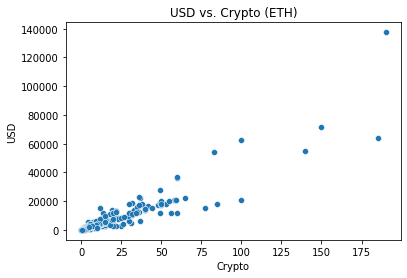

In [40]:
sns.scatterplot(x=df_punks.Crypto, y=df_punks.USD).set(title='USD vs. Crypto (ETH)')

# Another Scatterplot

[Text(0.5, 1.0, 'USD vs. Crypto (ETH)')]

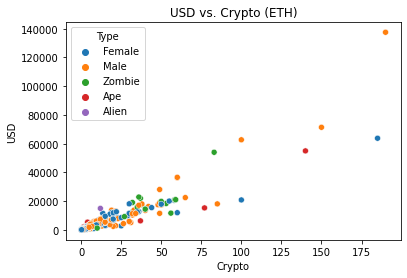

In [41]:
sns.scatterplot(x=df_punks.Crypto, y=df_punks.USD, hue = df_punks.Type).set(title='USD vs. Crypto (ETH)')

# Creating a New Variable

In [42]:
df_punks['Ratio of Currency'] = df_punks['USD']/df_punks['Crypto']

# Summary of 'Ratio of Currency' Variable

In [43]:
df_punks['Ratio of Currency'].describe()

count    7554.000000
mean      327.962994
std       188.430207
min         1.000000
25%       202.857143
50%       326.887464
75%       367.200000
max      1409.090909
Name: Ratio of Currency, dtype: float64

# Column Names

In [44]:
df_punks.columns

Index(['Transaction', 'From', 'To', 'Crypto', 'USD', 'Txn', 'ID', 'Sex',
       'Type', 'Skin', 'Slots', 'Rank', 'Ratio of Currency'],
      dtype='object')

# Crypto Histogram

[Text(0.5, 1.0, 'Histogram of Crypto')]

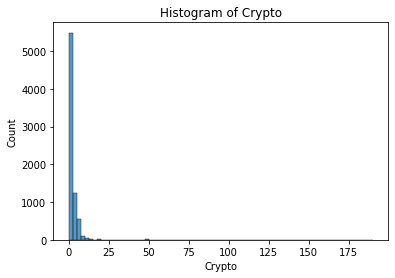

In [45]:
sns.histplot(x=df_punks.Crypto, binwidth=2.5).set(title='Histogram of Crypto') # binwidth is the length of each rectangular bar

# Finding the most expensive punk that was last sold in the sample data

We can look at the most expensive punk that was last sold by using the .loc (location) command and the .idxmax (index for the max value) command.

In [46]:
df_punks.loc[df_punks.Crypto.idxmax()]

Transaction                 Sold
From                         jmg
To                      0x7224a1
Crypto                    189.99
USD                       137522
Txn                   2020-12-30
ID                          3306
Sex                          Guy
Type                        Male
Skin                         Mid
Slots                          3
Rank                 6437574000%
Ratio of Currency        723.838
Name: 5234, dtype: object

# Average Slots By Sex
### As a breakdown: <br>
df_punks.loc - locates the values in the dataframe meeting the criteria inside the brackets <br>
df_punks.Sex == 'XX' - subsets the dataset with the rows that meet the critera<br>
'Slots' - selects the Slots column from the dataset<br>
.mean() - provides the mean

In [47]:
df_punks.loc[df_punks.Sex == 'Girl', 'Slots'].mean()

2.763076923076923

In [48]:
df_punks.loc[df_punks.Sex == 'Guy', 'Slots'].mean()

2.7864487213287634

# Combine Types

We can label Alien, Ape and Zombie as non_human, and similarly we can label Female and Male as human.

This code works by creating new columns non_human and human by selecting the rows that contain "Alien", "Ape", "Zombie" and "Female", "Male" in the Type column.

Note the | operator means is interpreted as 'or', so the non_human column assignment looks at the Type column in the Punks data and assigns a 'True' value if the Punk Type is Alien OR Ape OR Zombie. Similarly, the Punk is assigned a 'True' value in the Human column if the Type is Female OR Male. 

In [52]:
df_punks['Non_human'] = (df_punks['Type'] == 'Alien') | (df_punks['Type'] == 'Ape') | (df_punks['Type'] == 'Zombie')

In [58]:
df_punks

,Transaction,From,To,Crypto,USD,Txn,ID,Sex,Type,Skin,Slots,Rank,Ratio of Currency,Non_human,Human
0,Sold,0xf5099e,14715954,25.00,2822.0,2018-11-30,0,Girl,Female,Mid,3,3682560000%,112.880000,False,True
1,Sold,0x00d7c9,10528156,1.60,386.0,2017-07-07,0,Girl,Female,Mid,3,3682560000%,241.250000,False,True
2,Sold,0xc352b5,55241,0.98,320.0,2017-06-23,0,Girl,Female,Mid,3,3682560000%,326.530612,False,True
3,Claimed,NaN,12800693,NaN,NaN,2017-06-23,0,Girl,Female,Mid,3,3682560000%,NaN,False,True
4,Sold,EliteCat,0xcf6165,60.00,36305.0,2020-11-30,1,Guy,Male,Dark,2,2050240500%,605.083333,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17549,Sold,TJ2010,gaus,59.00,21062.0,2020-09-27,9997,Guy,Zombie,Zombie,2,0.023188000%,356.983051,True,False
17550,Claimed,NaN,TJ2010,NaN,NaN,2017-06-23,9997,Guy,Zombie,Zombie,2,0.023188000%,NaN,True,False
17551,Sold,7595170,TokenAng,15.00,9499.0,2020-12-27,9998,Girl,Female,Mid,3,1452800000%,633.266667,False,True
17552,Claimed,NaN,0x73e4a2,NaN,NaN,2017-06-23,9998,Girl,Female,Mid,3,1452800000%,NaN,False,True


In [59]:
df_punks['Human'] = (df_punks['Type'] == 'Female')| (df_punks['Type'] == 'Male')

In [60]:
df_punks

,Transaction,From,To,Crypto,USD,Txn,ID,Sex,Type,Skin,Slots,Rank,Ratio of Currency,Non_human,Human
0,Sold,0xf5099e,14715954,25.00,2822.0,2018-11-30,0,Girl,Female,Mid,3,3682560000%,112.880000,False,True
1,Sold,0x00d7c9,10528156,1.60,386.0,2017-07-07,0,Girl,Female,Mid,3,3682560000%,241.250000,False,True
2,Sold,0xc352b5,55241,0.98,320.0,2017-06-23,0,Girl,Female,Mid,3,3682560000%,326.530612,False,True
3,Claimed,NaN,12800693,NaN,NaN,2017-06-23,0,Girl,Female,Mid,3,3682560000%,NaN,False,True
4,Sold,EliteCat,0xcf6165,60.00,36305.0,2020-11-30,1,Guy,Male,Dark,2,2050240500%,605.083333,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17549,Sold,TJ2010,gaus,59.00,21062.0,2020-09-27,9997,Guy,Zombie,Zombie,2,0.023188000%,356.983051,True,False
17550,Claimed,NaN,TJ2010,NaN,NaN,2017-06-23,9997,Guy,Zombie,Zombie,2,0.023188000%,NaN,True,False
17551,Sold,7595170,TokenAng,15.00,9499.0,2020-12-27,9998,Girl,Female,Mid,3,1452800000%,633.266667,False,True
17552,Claimed,NaN,0x73e4a2,NaN,NaN,2017-06-23,9998,Girl,Female,Mid,3,1452800000%,NaN,False,True


In [61]:
df_punks[df_punks.From.duplicated(keep=False)]

,Transaction,From,To,Crypto,USD,Txn,ID,Sex,Type,Skin,Slots,Rank,Ratio of Currency,Non_human,Human
0,Sold,0xf5099e,14715954,25.00,2822.0,2018-11-30,0,Girl,Female,Mid,3,3682560000%,112.880000,False,True
1,Sold,0x00d7c9,10528156,1.60,386.0,2017-07-07,0,Girl,Female,Mid,3,3682560000%,241.250000,False,True
2,Sold,0xc352b5,55241,0.98,320.0,2017-06-23,0,Girl,Female,Mid,3,3682560000%,326.530612,False,True
3,Claimed,NaN,12800693,NaN,NaN,2017-06-23,0,Girl,Female,Mid,3,3682560000%,NaN,False,True
4,Sold,EliteCat,0xcf6165,60.00,36305.0,2020-11-30,1,Guy,Male,Dark,2,2050240500%,605.083333,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548,Claimed,NaN,11124649,NaN,NaN,2017-06-23,9996,Guy,Male,Light,4,6147702000%,NaN,False,True
17549,Sold,TJ2010,gaus,59.00,21062.0,2020-09-27,9997,Guy,Zombie,Zombie,2,0.023188000%,356.983051,True,False
17550,Claimed,NaN,TJ2010,NaN,NaN,2017-06-23,9997,Guy,Zombie,Zombie,2,0.023188000%,NaN,True,False
17552,Claimed,NaN,0x73e4a2,NaN,NaN,2017-06-23,9998,Girl,Female,Mid,3,1452800000%,NaN,False,True
